# Model training 
First iteration of model training 

Packages 

In [1]:
import os
#Change current directory
os.chdir ('../..')
#Check the current directory
os.getcwd()

'/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn'

In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from datetime import datetime 
import random
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.svm import SVC
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import xgboost as xgb
import pickle 
import json

from src.logger import logging
from src.logger_class import setup_logger
from src.eda import utils
from src.eda.utils import columnsFamilies

In [85]:
#Get todays's date
date_time = datetime.today().strftime("%Y-%m-%d")
#Declare paths
train_dev_test_path = "data/train_dev_test"
data_path = "data/experiments_data"
data_samples_path = "data/data_samples"
artifacts_path = "artifacts/eda"
x_y_sets_path = "data/x_y_sets"
models_path = "models/ml_models"
models_ressources_path = "models/ressources"

In [5]:
#Reload modules in case a change has occured
#import importlib
#from src.components import data_ingestion, data_structuring
#importlib.reload(data_ingestion)
#importlib.reload(data_structuring)

### Loding data

--------------------

In [4]:
#Loading data
data_date = "2024-10-22"
x_train = pd.read_csv(f"{x_y_sets_path}/{data_date}_x_train_norm.csv", index_col = 0)
x_dev = pd.read_csv(f"{x_y_sets_path}/{data_date}_x_dev_norm.csv", index_col = 0)
x_test = pd.read_csv(f"{x_y_sets_path}/{data_date}_x_test_norm.csv", index_col = 0)
y_train = pd.read_csv(f"{x_y_sets_path}/{data_date}_y_train.csv", index_col = 0)
y_dev = pd.read_csv(f"{x_y_sets_path}/{data_date}_y_dev.csv", index_col = 0)
y_test = pd.read_csv(f"{x_y_sets_path}/{data_date}_y_test.csv", index_col = 0)

print (f"x_train shape : {x_train.shape}")
print (f"y_train shape : {y_train.shape}")
print ("------------------")
print (f"x_dev shape : {x_dev.shape}")
print (f"y_dev shape : {y_dev.shape}")
print ("------------------")
print (f"x_test shape : {x_test.shape}")
print (f"y_test shape : {y_test.shape}")

x_train shape : (86992, 531)
y_train shape : (86992, 1)
------------------
x_dev shape : (14563, 531)
y_dev shape : (14563, 1)
------------------
x_test shape : (5839, 531)
y_test shape : (5839, 1)


In [5]:
#target value_counts
print ("y_train counts")
print (y_train.value_counts())
print ("-------------")
print ("y_dev counts")
print (y_dev.value_counts())
print ("-------------")
print ("y_test counts")
print (y_test.value_counts())

y_train counts
churn
1        43700
0        43292
Name: count, dtype: int64
-------------
y_dev counts
churn
1        7325
0        7238
Name: count, dtype: int64
-------------
y_test counts
churn
1        2938
0        2901
Name: count, dtype: int64


In [6]:
#transform y to array
y_train = y_train.values.flatten()
y_dev = y_dev.values.flatten()
y_test = y_test.values.flatten()
print (f"y_train length : {len(y_train)}")
print (f"y_dev length : {len(y_dev)}")
print (f"y_test length : {len(y_test)}")

y_train length : 86992
y_dev length : 14563
y_test length : 5839


-------------------

### Model training 

#### XGBoost

In [7]:
#Data to DMatrix
dtrain = xgb.DMatrix(data=x_train, label=y_train)
ddev = xgb.DMatrix(data=x_dev, label=y_dev)
dtest = xgb.DMatrix(data=x_test, label=y_test)
evals = [(dtrain, "train"), (ddev, "dev")]
eval_hist = {}

In [48]:
#Model parameters 
params_2 = {
    'objective': 'binary:logistic',  
    'eval_metric': 'aucpr',       
    'eta': 0.1,                     
    'max_depth': 4,                  
    'subsample': 0.9,                 
    'colsample_bytree': 1,           
    'min_child_weight': 1,            
    'gamma': 0.1,                     
    'scale_pos_weight': 1,                        
    'learning_rate': 0.01
}

In [58]:
#Trianing model
XGB_MODEL = 0
XGB_MODEL = xgb.train( params = params_2,
                        dtrain=dtrain,
                        num_boost_round=4000,
                        evals=evals,
                        evals_result=eval_hist,
                        early_stopping_rounds=30,  #Stop early if no improvement
                        verbose_eval=True
                    )

[0]	train-aucpr:0.88079	dev-aucpr:0.88258
[1]	train-aucpr:0.88547	dev-aucpr:0.88690
[2]	train-aucpr:0.89224	dev-aucpr:0.89297
[3]	train-aucpr:0.89203	dev-aucpr:0.89283
[4]	train-aucpr:0.89079	dev-aucpr:0.89274
[5]	train-aucpr:0.89086	dev-aucpr:0.89285
[6]	train-aucpr:0.89082	dev-aucpr:0.89273
[7]	train-aucpr:0.89091	dev-aucpr:0.89307
[8]	train-aucpr:0.89099	dev-aucpr:0.89313
[9]	train-aucpr:0.89545	dev-aucpr:0.89843
[10]	train-aucpr:0.89708	dev-aucpr:0.89965
[11]	train-aucpr:0.89707	dev-aucpr:0.89968
[12]	train-aucpr:0.89763	dev-aucpr:0.89965
[13]	train-aucpr:0.89843	dev-aucpr:0.90021
[14]	train-aucpr:0.89841	dev-aucpr:0.90018
[15]	train-aucpr:0.89906	dev-aucpr:0.90078
[16]	train-aucpr:0.89903	dev-aucpr:0.90082
[17]	train-aucpr:0.89918	dev-aucpr:0.90124
[18]	train-aucpr:0.89875	dev-aucpr:0.90100
[19]	train-aucpr:0.89886	dev-aucpr:0.90107
[20]	train-aucpr:0.89888	dev-aucpr:0.90112
[21]	train-aucpr:0.89894	dev-aucpr:0.90113
[22]	train-aucpr:0.89987	dev-aucpr:0.90237
[23]	train-aucpr:0.90

In [88]:
#Save eval hist 
with open (f"{models_ressources_path}/{date_time}_eval_hist_xgboost_aucpr.json", "w") as f:
    json.dump(eval_hist, f)

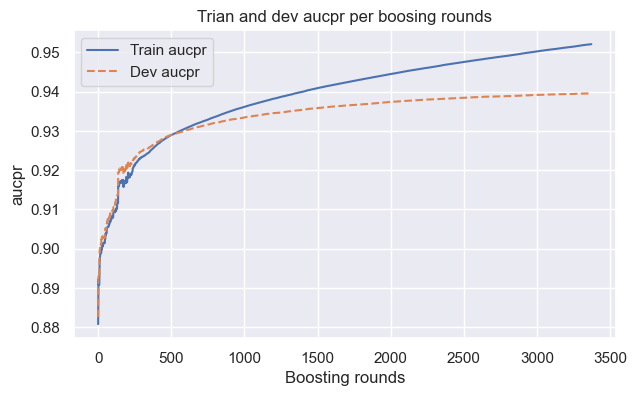

In [59]:
#Plot eval metric
utils.vis_eval_metric(eval_hist, eval_metric="aucpr")

In [71]:
#Predictions
y_test_predicted_prob = XGB_MODEL.predict(dtest)
y_train_predicted_prob = XGB_MODEL.predict(dtrain)
#Transform probas into predictions
THRESHOLD = 0.5
y_test_pred = [int(y_test_predicted_prob[i]>THRESHOLD) for i in range(len(y_test_predicted_prob))]
y_train_pred = [int(y_train_predicted_prob[i]>THRESHOLD) for i in range(len(y_train_predicted_prob))]

xgboost accuracy    :   0.8590512073985271
xgboost precision   :   0.8938547486033519
xgboost recall      :   0.8168822328114363
xgboost f1 score    :   0.8536368486573004

                  train set      ||     test set
------------------------------------------------------------
xgboost accuracy    : 0.8752299061982711  ||  0.8590512073985271
xgboost precision   : 0.9066508195909474  ||  0.8938547486033519
xgboost recall      : 0.8378947368421052  ||  0.8168822328114363
xgboost f1 score    : 0.8709178697999667  ||  0.8536368486573004
-------------------------------------------------------------


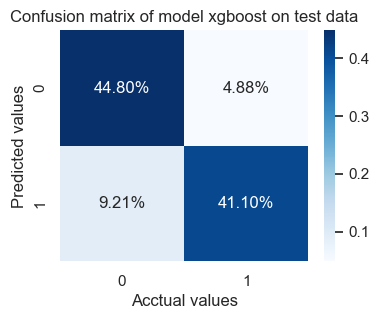

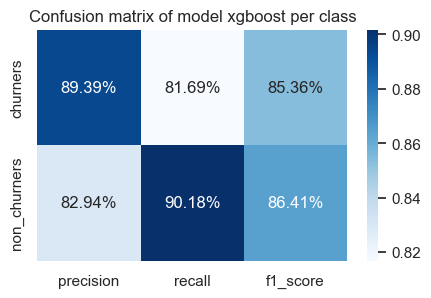

In [72]:
#Visualize model performance
utils.report_model_performances(y_train, y_train_pred, y_test, y_test_pred, model_name = "xgboost")

#### Model calibration 

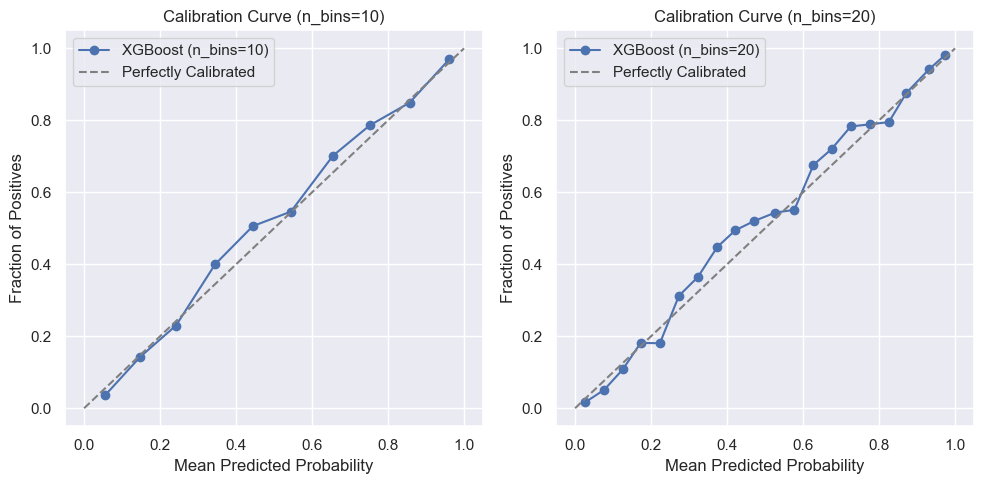

In [63]:
#Plot calibration curve 
utils.vis_calibration_curve(n_bins=[10, 20], y_test=y_test, y_test_predicted_prob=y_test_predicted_prob)

#### ROC curve 

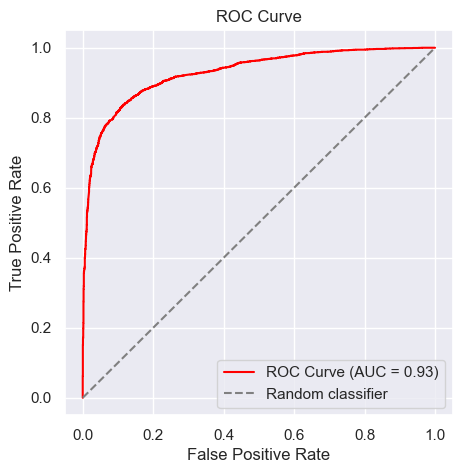

In [64]:
#Plot roc curve 
utils.vis_roc_curve(y_test, y_test_predicted_prob)

#### Feature importance 

In [65]:
#Get feature importance from model
importance =  XGB_MODEL.get_score(importance_type = "weight")

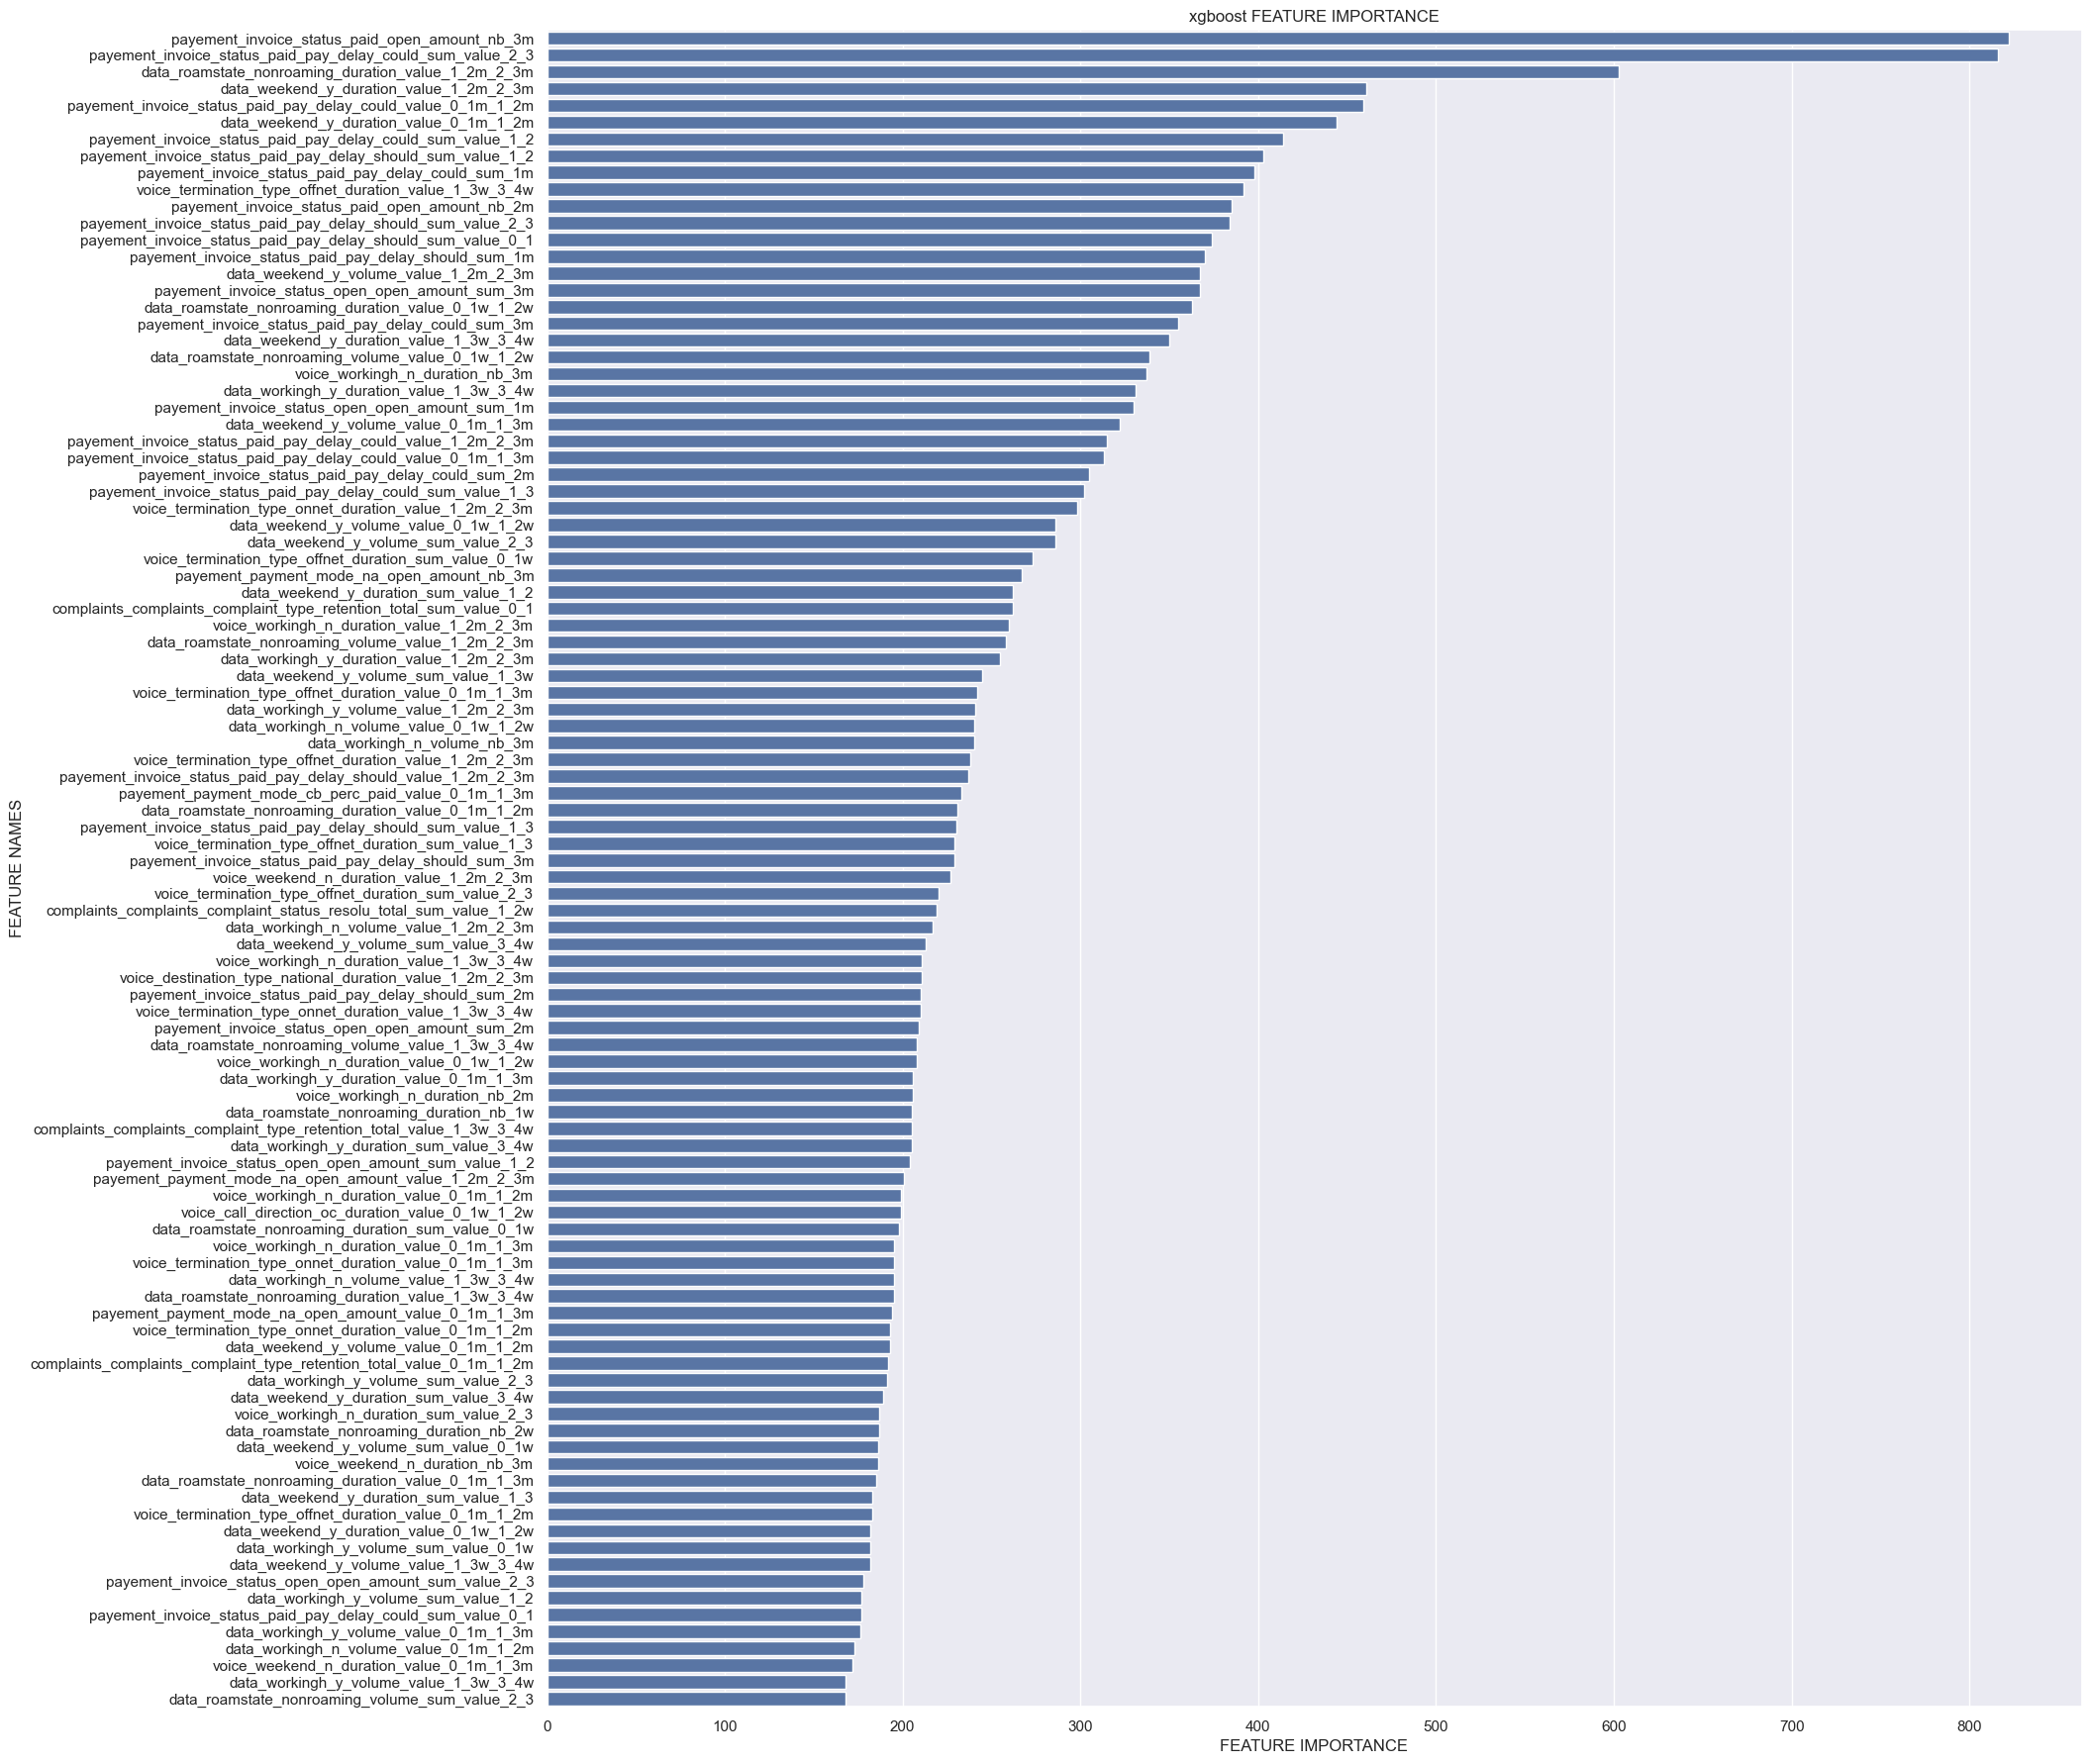

In [73]:
#Plot importance
utils.plot_feature_importance(importance.values(), importance.keys(), model_type="xgboost", max_n_features=100, figsize=(20, 22))

#### Precision recall per thereshold values

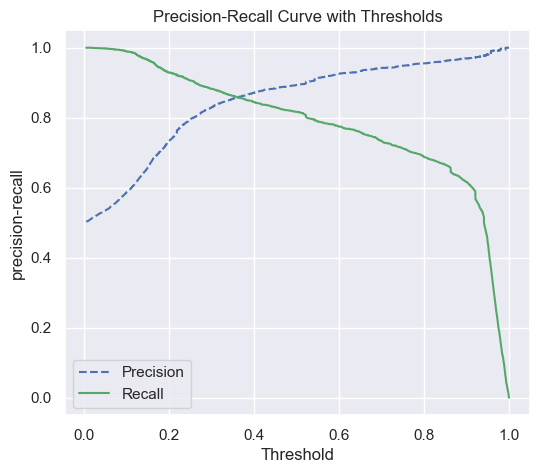

In [68]:
#Precision recall curve
utils.vis_precision_recall_thereshold(y_test, y_test_predicted_prob)

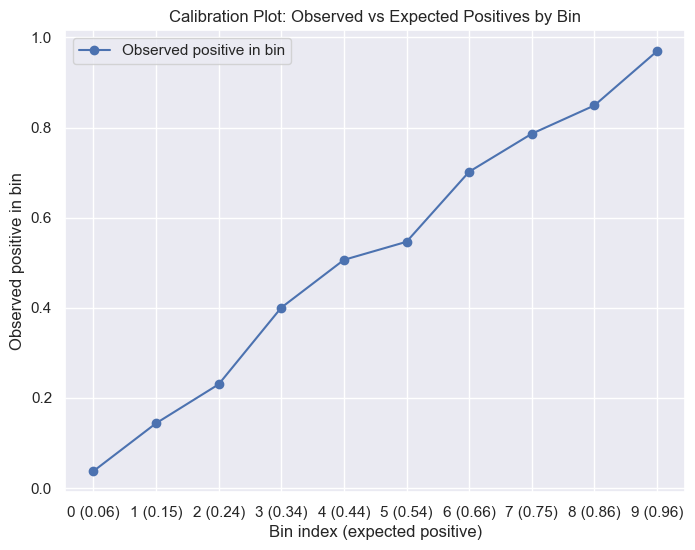

In [83]:
y_test_predicted_prob = XGB_MODEL.predict(dtest)
# Assuming `pred_probs` is your array of predicted probabilities and `y_test` is your true labels
df = pd.DataFrame({"y_test_predicted_prob": y_test_predicted_prob, "true_labels": y_test})

# Define bins and categorize predictions
num_bins = 10
df["bin"] = pd.cut(df["y_test_predicted_prob"], bins=np.linspace(0, 1, num_bins + 1), labels=False)

# Calculate expected and observed positive rates per bin
expected_positive_rate = df.groupby("bin")["y_test_predicted_prob"].mean()  # Avg predicted prob per bin
observed_positive_rate = df.groupby("bin")["true_labels"].mean()  # Fraction of actual positives

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(observed_positive_rate, marker='o', label="Observed positive in bin")
#plt.plot(x = [0,1], y=[0,1], marker="--", color = "grey" )
plt.xticks(
    ticks=np.arange(num_bins), 
    labels=[f"{i} ({rate:.2f})" for i, rate in enumerate(expected_positive_rate)]
)
plt.xlabel("Bin index (expected positive)")
plt.ylabel("Observed positive in bin")
plt.title("Calibration Plot: Observed vs Expected Positives by Bin")
plt.legend()
plt.show()
plt.show()

#### Save model 

In [75]:
#Save model as pickle file 
pickle.dump(XGB_MODEL, open(f"{models_path}/{date_time}_xgb_model_aucpr.pkl", "wb"))

In [76]:
#Save model as json file
XGB_MODEL.save_model(f"{models_path}/{date_time}_xgb_model_aucpr.json")

In [90]:
#Load model
#with open(f"{models_path}/2024-10-28_xgb_model_aucpr.pkl", "rb") as f:
#    t_model = pickle.load(f)